### Import Resources

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
train_cnn = pd.read_csv("data/training.csv")

### Explore the data

In [3]:
train_cnn.head(1)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...


In [4]:
train_cnn.shape

(7049, 31)

### Visualize a subset of the data

In [5]:
def string2image(string):
    """Converts a string to a numpy array."""
    return np.array([int(item) for item in string.split()]).reshape((96, 96))

def plot_faces(nrows=5, ncols=5):
    """Randomly displays some faces from the training data."""
    selection = np.random.choice(train_cnn.index, size=(nrows*ncols), replace=False)
    image_strings = train_cnn.loc[selection]['Image']
    fig, axes = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=ncols)
    for string, ax in zip(image_strings, axes.ravel()):
        ax.imshow(string2image(string), cmap='gray')
        ax.axis('off')

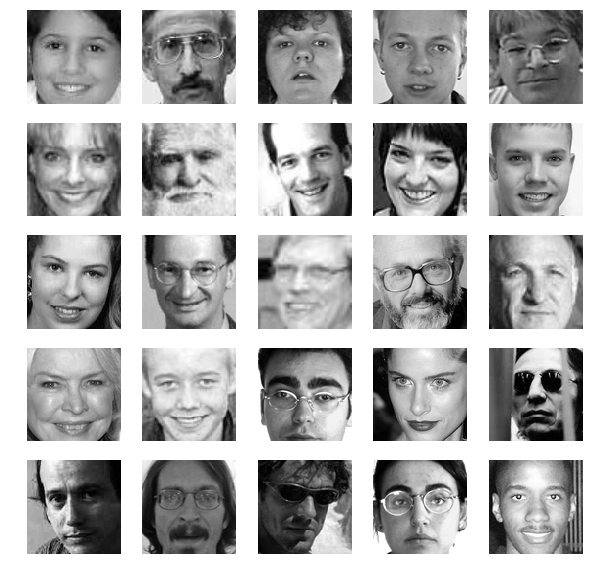

In [6]:
plot_faces()

Let's now add to that plot the facial keypoints that were tagged. First, let's do an example :

In [7]:
keypoint_cols = list(train_cnn.columns)[:-1]

In [8]:
xy = train_cnn.iloc[0][keypoint_cols].values.reshape((15, 2))
xy

array([[66.0335639098, 39.0022736842],
       [30.2270075188, 36.4216781955],
       [59.582075188000005, 39.647422556399995],
       [73.1303458647, 39.9699969925],
       [36.3565714286, 37.3894015038],
       [23.4528721805, 37.3894015038],
       [56.9532631579, 29.0336481203],
       [80.2271278195, 32.2281383459],
       [40.2276090226, 29.0023218045],
       [16.3563789474, 29.6474706767],
       [44.4205714286, 57.0668030075],
       [61.1953082707, 79.9701654135],
       [28.6144962406, 77.38899248119999],
       [43.3126015038, 72.9354586466],
       [43.1307067669, 84.4857744361]], dtype=object)

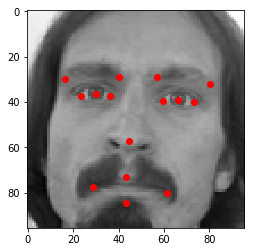

In [9]:
plt.plot(xy[:, 0], xy[:, 1], 'ro')
plt.imshow(string2image(train_cnn.iloc[0]['Image']), cmap='gray')

## Plot faces with keypoints

In [10]:
def plot_faces_with_keypoints(nrows=5, ncols=5):
    """Randomly displays some faces from the training data with their keypoints."""
    selection = np.random.choice(train_cnn.index, size=(nrows*ncols), replace=False)
    image_strings = train_cnn.loc[selection]['Image']
    keypoint_cols = list(train_cnn.columns)[:-1]
    keypoints = train_cnn.loc[selection][keypoint_cols]
    fig, axes = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=ncols)
    for string, (iloc, keypoint), ax in zip(image_strings, keypoints.iterrows(), axes.ravel()):
        xy = keypoint.values.reshape((15, 2))
        ax.imshow(string2image(string), cmap='gray')
        ax.plot(xy[:, 0], xy[:, 1], 'ro')
        ax.axis('off')

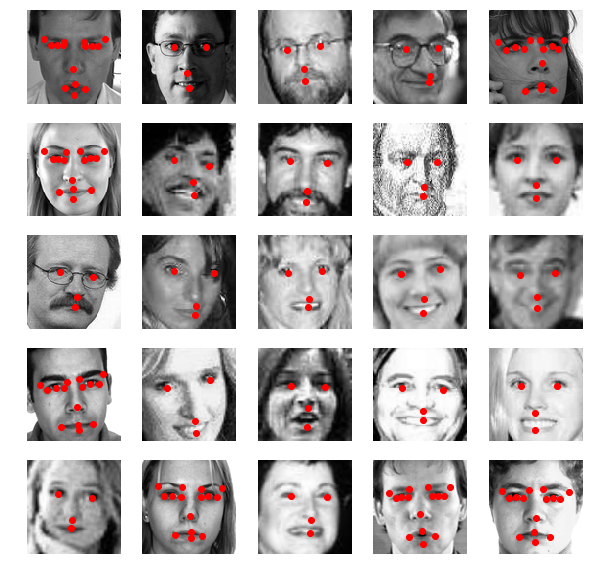

In [11]:
plot_faces_with_keypoints()

We can make several observations from this image:

 - some images are high resolution, some are low

 - some images have all 15 keypoints, while some have only a few

## Some stat

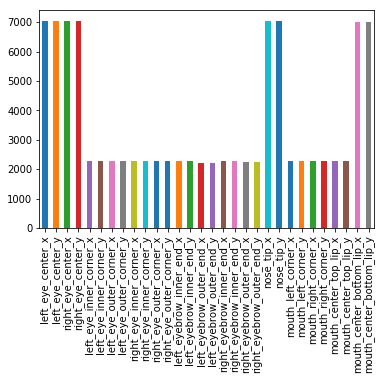

In [12]:
train_cnn.describe().loc['count'].plot.bar()

What this plot tells us is that in this dataset, only 2000 images are "high quality" with all keypoints, while 5000 other images are "low quality" with only 4 keypoints labelled.

## Preprocess Data

In [13]:
fully_annotated = train_cnn.dropna()

In [14]:
fully_annotated.shape

(2140, 31)

In [15]:
X = np.stack([string2image(string) for string in fully_annotated['Image']]).astype(np.float)[:, :, :, np.newaxis]

In [16]:
y = np.vstack(fully_annotated[fully_annotated.columns[:-1]].values)

In [17]:
X.shape, X.dtype

((2140, 96, 96, 1), dtype('float64'))

In [18]:
y.shape, y.dtype

((2140, 30), dtype('float64'))

In [19]:
X_train = X / 255.

In [20]:
output_pipe = make_pipeline(
    MinMaxScaler(feature_range=(-1, 1))
)

y_train = output_pipe.fit_transform(y)

In [21]:
test_cnn = pd.read_csv("data/test.csv")

In [31]:
fully_annotated_test = test_cnn.dropna()

In [32]:
fully_annotated_test.shape

(1783, 2)

In [33]:
X_test = np.stack([string2image(string) for string in fully_annotated_test['Image']]).astype(np.float)[:, :, :, np.newaxis]

In [34]:
y_test = np.vstack(fully_annotated_test[fully_annotated_test.columns[:-1]].values)

In [35]:
X_test.shape, X_test.dtype

((1783, 96, 96, 1), dtype('float64'))

In [36]:
y_test.shape, y_test.dtype

((1783, 1), dtype('int64'))

In [37]:
X_test = X_test / 255.

In [39]:
y_test = output_pipe.fit_transform(y_test)

c:\users\pc\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
